# MAKİNE ÖĞRENİMİ İLE FOTOĞRAFLARDAKİ EL YAZISI HARFLERİ VE RAKAMLARI TANIMA

### Ders: Bilgisayar Zeki Sistem Uygulamaları

### Hazırlayanlar: Mustafa Sedat Şenli - 460121058  |  Yağmur Nisa Erdoğan - 460121020

### Hazırlama Süreci: Konumuz python ve kütüphanelerini kullanarak, makine öğrenimi ile fotoğrafları alınmış el yazısı harfleri ve rakamları tanıması, araştırmalarımız ve izlediğimiz kaynaklar doğrultusunda farklı yazılış biçimlerine sahip, harfleri ve rakamları içeren bir datasete(veri kümesine) ihtiyacımız vardı, harfler ile sayıları birlikte içeren Scikit-Learn gibi interaktif kütüphanelerde hazır bir dataset bulamadık. Sorunu Kaggle'dan temin ettiğimiz iki ayrı harf ve rakam datasetini birleştirerek çözdük, makinenin öğrenimi için verileri kütüphane kullanmadan bilgisayarımızdan çektik. Projemizi çalıştırmak için gerekli kodları iki ayrı video kaynağını harmanlayarak deneyerek ve öğrenerek yaptık, aldığımız hataları ise Stack Overflow gibi websiteleri yardımıyla çözdük. Her hücredeki kodların amaçlarını ise her kod bloklarının altında açıkladık, sayfayı aşağı sürükleyerek inceleyebilirsiniz.

## Kütüphane Yüklemeleri

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Gerekli Python Kütüphaneler**

_NumPy: Python programlama dili için büyük, çok boyutlu dizileri ve matrisleri destekleyen, bu diziler üzerinde çalışacak üst düzey matematiksel işlevler ekleyen bir kitaplıktır._
 
_Pandas: Veri işlemesi ve analizi için Python programlama dilinde yazılmış olan bir yazılım kütüphanesidir._

_Matplotlip: Python programlama dili ve sayısal matematik uzantısı NumPy için bir çizim kitaplığıdır._

_Scikit-Learn: Python programlama dili için ücretsiz bir yazılım makine öğrenimi kitaplığıdır. Logistic Regression (Lojistik Regresyon) sınıflandırma işlemi yapmaya yarayan bir regresyon yöntemidir.Train Test Split, verileri tek satırlık bir satıra bölmek için tek bir çağrıya veri girmek için uygulamayı sarmalar._

_OpenCV: Gerçek zamanlı bilgisayar görüsü uygulamalarında kullanılan açık kaynaklı kütüphane._

## Dataset Sınıfının Oluşturulması

In [11]:
import os

path = "C:/Users/90531/Desktop/Bilgisayar Zeki Sistem Uygulamaları Projesi/dataset/train/"
files = os.listdir(path)[:36]
print(files)

classes={'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'A':'A','B':'B','C':'C','D':'D','E':'E', 
        'F':'F','G':'G','H':'H','I':'I','J':'J','K':'K','L':'L','M':'M', 'N':'N','O':'O','P':'P','Q':'Q','R':'R',
        'S':'S','T':'T','U':'U','V':'V','W':'W','Y':'Y','Z':'Z'}



['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


_Bu Python kodu ile bir klasörün içindeki dosyaların isimlerini okuduk ve bunları bir liste içinde sakladık. Bu kodla bir sözlük oluşturduk ve bu sözlükte her bir harf veya sayı için bir değer atandı._

_İlk satırda,"os" modülünü içe aktardık. Bu modül, Python'da işletim sistemiyle etkileşim kurmak için fonksiyonlar sağlar._

_İkinci satırda, "path" adlı bir değişkene datasetin bulunduğu dosya yolunu atadık._

_Üçüncü satırda, "os.listdir()" fonksiyonu kullanarak, "path" değişkeninde belirtilen klasörün içindeki harfler ve rakamların bulunduğu klasör isimlerini bir liste olarak aldık.Bu listeyi, sonraki satırda "files" adlı değişkene atadık._

_Dördüncü satırda, "classes" adlı bir sınıflandırma sözlüğü oluşturduk. Bu sözlükte, her bir harf veya sayı için bir anahtar ve değer atandı._

In [12]:
import cv2 

X=[]
Y=[]

for cl in classes:
    pth = path+cl
    for img_name in os.listdir(pth):
        img = cv2.imread(pth+"/"+img_name,0)
        X.append(img)
        Y.append(classes[cl])
print("Dataset başarıyla oluşturuldu!")

Dataset başarıyla oluşturuldu!


_Bu Python kodu ile bir klasörün içindeki görüntüleri okuduk ve bu görüntüleri X ve Y adlı iki listeye ekledik. X listesi, görüntülerin pixel değerlerini saklıyor, Y listesi ise görüntülerin hangi sınıfa ait olduğunu gösteriyor._

_İlk satırda, "cv2" modülünü içe aktardık. Bu modül, OpenCV adlı bir görüntü işleme kütüphanesini kullanarak görüntülerle çalışmak için fonksiyonlar sağladık.İkinci ve üçüncü satırda, X ve Y adlı iki liste oluşturduk._

_Dördüncü satırda, "classes" sözlüğündeki her bir harf veya sayı için bir döngü oluşturduk. Bu döngü, sözlükteki her bir harf veya sayıyı bir değişkene atar ve bu değişken "cl" olarak adlandırır._

_Beşinci satırda, her bir harf veya sayı için bir dosya yolu oluşturduk. Bu dosya yolu, "path" değişkeninde belirtilen yolu ve "cl" değişkeninde belirtilen harf veya sayıyı içerir. Örneğin, "path" değişkeninde "C:/Users/90531/Desktop/Bilgisayar Zeki Sistem Uygulamaları Projesi/dataset/train/" olarak belirtilmiş ve "cl" değişkeni "0" olarak atanmışsa, dosya yolu "C:/Users/90531/Desktop/Bilgisayar Zeki Sistem Uygulamaları Projesi/dataset/train/0" olarak oluşturulur._

_Altıncı satırda, "pth" değişkeninde belirtilen klasörün içindeki dosyaların isimleri bir liste olarak aldık ve bu liste içinde bir döngü oluşturduk. Bu döngüde, her bir dosya için __aşağıdaki işlemleri__ gerçekleştiriyoruz:_

• Görüntü dosyası okundu ve "img" değişkenine atandı. "cv2.imread()" fonksiyonu, görüntü dosyasını okuyor ve görüntüyü numpy dizisi olarak döndürüyor. Bu fonksiyonun ikinci argümanını "0" olarak belirledik, bu da görüntünün siyah beyaz olarak okunmasını sağladı.

• Görüntüyü, "X" listesine ekledik.

• Görüntünün hangi sınıfa ait olduğu bilgisini, "Y" listesine ekledik. Bu bilgiyi, "classes" sözlüğünden aldık ve "cl" değişkeninde belirtilen harf veya sayıya göre sözlükten değer aldık. Örneğin, "cl" değişkeni "0" olarak atanmışsa, sözlükten "0" değeri aldık ve "Y" listesine ekledik.

In [13]:
pd.Series(Y).value_counts()

6    1444
1    1443
5    1388
0    1301
3    1301
4    1277
2    1267
8    1198
9    1195
A    1105
I    1078
S    1016
G    1011
B     988
Z     965
N     931
R     910
P     838
F     836
Q     805
T     784
L     728
H     727
D     690
K     672
O     667
M     651
V     638
U     610
Y     589
W     581
E     548
J     526
C     470
7     285
dtype: int64

_Bu kod satırıyla, "Y" listesi içindeki elemanların sayısını hesapladık ve bu elemanların sayılarını bir sözlük şeklinde döndürdük. "Y" listesi içindeki elemanların sayısını gösterdik. Örnek verecek olursak, "6" elemanı 1444 tane olduğu, "1" elemanı 1443 tane olduğu vb. görülmekte. Bu çıktı, veri setinin dengeli olup olmadığı hakkında bize bilgi veriyor. Eğer "Y" listesi içinde bazı elemanların çok daha fazla sayıda olduğunu görürsek, veri setinin dengesiz olduğunu anlarız ve bu durum modelin doğruluk performansını etkileyeceği için düzenlememiz gerekir._

In [14]:
X[0].shape

(32, 32)

_Bu kod satırı, "X" listemizdeki ilk elemanının boyutunu gösteriyor. "X" listemiz, görüntülerin numpy dizisi olarak sakladığımız bir listedir._

In [15]:
img_src = cv2.imread('C:/Users/90531/Desktop/Bilgisayar Zeki Sistem Uygulamaları Projesi/dataset/train/0/1.jpg',0)
print (img_src)

None


_Bu kod satırıyla, "C:/Users/90531/Desktop/Bilgisayar Zeki Sistem Uygulamaları Projesi/dataset/train/0/1.jpg" dizininde bulunan bir görüntü dosyasını "cv2.imread()" fonksiyonuyla numpy dizisine döndürdük, ikinci argümanı "0" olarak belirttik ki bu da görüntünün siyah-beyaz olarak okunmasını sağladı. Görüntüyü "img_src" değişkenine atadık.Sonra, "print (img_src)" kod satırı ile görüntünün bilgisi ekrana yazdırdık çalıştığını görmüş olduk. Bu bilgi, görüntünün satır sayısını, sütun sayısını ve kanal sayısını içeren bilgileri içeriyor._

In [16]:
print(type(X))
X = np.array(X)
Y = np.array(Y)
print(type(X)) 

<class 'list'>
<class 'numpy.ndarray'>


_İlk olarak, "print(type(X))" kod satırı ile "X" listesinin tipi ekrana yazdırdık. Bu sayede, "X" listesinin ne tür bir veri yapısında olduğunu gösterdik._

_Sonra, "X = np.array(X)" kod satırı ile "X" listesini numpy dizisi olarak dönüştürdük. Numpy, Python'da sayısal verileri işlemek için kullanılan bir kütüphanedir._

_Aynı şekilde, "Y = np.array(Y)" kod satırı ile de "Y" listesini numpy dizisi olarak dönüştürdük._

_Son olarak, "print(type(X))" kod satırı ile "X" listesinin tipini tekrar ekrana yazdırdık. Bu sayede, "X" listesinin numpy dizisi olarak dönüştürülmüş olup olmadığı kontrol ettik._

## Veri Analizi

0


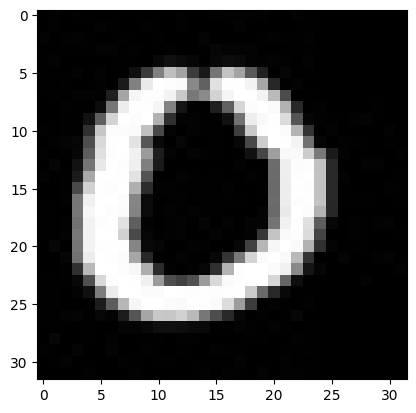

In [17]:
plt.imshow(X[1000],cmap="gray")
print(Y[1000])

_Bu kod satırıyla "X" listesinin 1000. elemanı olan bir görüntüyü ekranda gösterdik ve bu görüntünün etiketini de ekranda yazdırdık._

_İlk olarak, "plt.imshow(X[1000],cmap="gray")" kod satırı ile "X" listesinin 1000. elemanı olan görüntüyü ekranda gösterdik. "plt.imshow()" fonksiyonu, bir görüntüyü ekranda göstermek için kullanılır ve "cmap="gray"" argümanı ile görüntü siyah-beyaz olarak gösterilir. Eğer "cmap" argümanını belirtilmeseydik, görüntü renkli olarak gösterilecekti._

_Son olarak, "print(Y[1000])" kod satırı ile görüntünün etiketini ekrana yazdırdık. "Y" listesi, görüntülerin etiketlerini içeren bir liste olduğu için "Y[1000]" ile "X" listesinin 1000. elemanına karşılık gelen etiketi almış olduk._

In [18]:
X.shape

(31463, 32, 32)

_"X.shape" kod satırı, "X" değişkeninin boyut bilgisini verir. "X" değişkeni, bir numpy olduğu için ve numpy dizilerinin boyut bilgisi, dizinin satır sayısı ve sütun sayısı bilgilerini öğrenmek göstermek için ekrana yazdırdık._

## Verileri Hazırlama 

In [19]:
X_new = X.reshape(len(X),-1)
print(X_new.shape)
print(Y.shape)

(31463, 1024)
(31463,)


_Bu kod satırı ile "X" dizisini yeniden şekillendirdik ve "Y" dizisinin boyut bilgisini verdik._

*İlk olarak, "X_new = X.reshape(len(X),-1)" kod satırı ile "X" dizisi yeniden şekillendirdik. "X.reshape()" fonksiyonu, bir numpy dizisinin şeklini değiştirir ve dizinin yeni şeklini belirtir. Bu fonksiyonun ilk argümanıyla dizinin satır sayısını belirttik ve ikinci argümanıyla ise dizinin sütun sayısını belirttik. "len(X)" ile "X" dizisinin satır sayısını bulduk ve "-1" ile sütun sayısını otomatik olarak hesapladık. Bu sayede, "X" dizisi tek bir satıra dönüştürüldü ve tüm elemanları tek bir sütunda toplandı.*

*Sonra, "print(X_new.shape)" kod satırı ile "X_new" dizisinin boyut bilgisini verdik. Bu bilgi, "X_new" dizisinin satır sayısı ve sütun sayısı bilgilerini içeriyor.*

_Son olarak, "print(Y.shape)" kod satırı ile de "Y" dizisinin boyut bilgisini verdik. Bu bilgi, "Y" dizisinin satır sayısı bilgisini içeriyor._

In [20]:
32*32

1024

In [21]:
print(X.shape)
print(X.ndim)
print(X_new.ndim)

(31463, 32, 32)
3
2


*Bu kod satırı, "X" ve "X_new" dizilerinin boyut bilgisi ve boyut sayısını verir.*

*İlk olarak, "print(X.shape)" kod satırı ile "X" dizisinin boyut bilgisi verdik. Bu bilgi, "X" dizisinin satır sayısı, sütun sayısı ve kanal sayısı bilgilerini içeriyor.*

*Sonra, "print(X.ndim)" kod satırı ile "X" dizisinin boyut sayısını verdik. "ndim" özelliği, bir numpy dizisinin boyut sayısını verir. Örneğin, "X" dizisinin boyut sayısı 3 ise, bu dizinin 3 boyutlu olduğu anlamına geliyor.*

*Son olarak, "print(X_new.ndim)" kod satırı ile "X_new" dizisinin boyut sayısını verdik. "X_new" dizisi, "X" dizisinin tek satıra dönüştürülmüş hali olduğundan, "X_new" dizisinin boyut sayısı 2 oluyor.*



## Verilerin Bölünmesi

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(X_new, Y,
                                               test_size=.20, random_state=10)

*Bu kod satırıyla "X_new" ve "Y" dizilerini eğitim ve test kümelerine ayırdık.*

*"train_test_split()" fonksiyonu, veri setini eğitim ve test kümelerine ayırmak için kullanılır. Bu fonksiyonun ilk argümanı eğitim verilerini, ikinci argümanı ise hedef değişkenlerini (etiketlerini) içeren bir numpy dizisidir. Fonksiyonun üçüncü argümanı olarak "test_size" belirttik ve bu argümanla, test veri kümesinin veri setinin toplamının yüzde kaç olacağını belirttik. Örneğin, "test_size=.20" ifadesi ile test veri kümesinin veri setinin toplamının yüzde 20'si kullanılır. Dördüncü argüman olarak "random_state" bu argüman, eğitim ve test veri kümelerinin rastgele nasıl ayırılacağını belirtiyor.*

In [23]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(25170, 1024) (25170,)
(6293, 1024) (6293,)


*İlk olarak, "print(xtrain.shape, ytrain.shape)" kod satırı ile eğitim veri kümelerinin boyut bilgisini verdik. "xtrain.shape" ile eğitim veri kümesinin satır sayısı ve sütun sayısı bilgisi verdik, "ytrain.shape" ise hedef değişkenlerinin (etiketlerin) satır sayısı bilgisini verdik.*

*Sonra, "print(xtest.shape, ytest.shape)" kod satırı ile test veri kümelerinin boyut bilgisini verdik. "xtest.shape" ile test veri kümesinin satır sayısı ve sütun sayısı bilgisini verdik, "ytest.shape" ise hedef değişkenlerin (etiketlerin) satır sayısı bilgisini verdik.*



## Ölçekleme Özelliği

In [24]:
print(xtrain.max())
print(xtest.max())
x_train = xtrain/255
x_test = xtest/255
print(x_train.max())
print(x_test.max())

255
255
1.0
1.0


*Bu kod satırı, eğitim ve test veri kümelerinin piksel değerlerini normalize ediyor.*

*İlk olarak, "print(xtrain.max())" ve "print(xtest.max())" kod satırları ile eğitim ve test veri kümelerinin en yüksek piksel değerlerini verdik. Bu değerler, görüntülerin en parlak piksellerini temsil ediyor.*

*Sonra, "x_train = xtrain/255" ve "x_test = xtest/255" kod satırları ile eğitim ve test veri kümelerinin piksel değerlerini normalize ettik. Normalizasyon, veri setindeki değerlerin bir aralıkta (örneğin, 0 ile 1 arasında) değiştirilmesidir. Bu sayede, veri setindeki değerler arasındaki farklılığı azaltmayı amaçladık ve modelin eğitimini daha kolay hale getirdik. Bu kod satırlarında, eğitim ve test veri kümelerinin piksel değerleri 255'e bölündü ve bu sayede, piksel değerleri 0 ile 1 arasında normalize edilmiş oldu.*

*Son olarak, "print(x_train.max())" ve "print(x_test.max())" kod satırları ile normalize edilen eğitim ve test veri kümelerinin en yüksek piksel değerlerini verdik. Bu değerler, normalizasyon işlemi sonrasında eğitim ve test veri kümelerinin en yüksek piksel değerlerini gösteriyor.*

## Özellik Seçimi: PCA(Temel Bileşenler Analizi)

In [25]:
from sklearn.decomposition import PCA

*"PCA" (Principal Component Analysis), veri setindeki değişkenler arasındaki ilişkileri açıklamaya yönelik bir boyut indirgeme yöntemidir. Bu yöntem, veri setindeki değişkenler arasındaki ilişkileri inceler ve veri setini daha az sayıda değişkene indirger. Bu sayede, veri setinin anlaşılırlığını arttırıyor ve veri setini işleme ve modelleme işlemlerini daha kolay hale getiriyor.*

*"from sklearn.decomposition import PCA" kod satırı, "sklearn" (Scikit-learn) kütüphanesinden "PCA" sınıfını içe aktardı. Bu sayede, veri setinde "PCA" yöntemini kullanarak boyut indirgeme işlemlerini gerçekleştirebileceğiz.*

In [26]:
print(x_train.shape, x_test.shape)
pca = PCA(.98)
xtrain = pca.fit_transform(x_train)
xtest = pca.transform(x_test)
print(xtrain.shape, xtest.shape)
print(pca.n_components)
print(pca.n_features_in_)

(25170, 1024) (6293, 1024)
(25170, 413) (6293, 413)
0.98
1024


*Bu kod satırı ile eğitim ve test veri kümelerinde "PCA" yöntemini kullanarak boyut indirgeme işlemini gerçekleştirdik.*

*İlk olarak, "print(x_train.shape, x_test.shape)" kod satırı ile eğitim ve test veri kümelerinin boyut bilgisini verdik. Bu bilgi, eğitim ve test veri kümelerinin satır sayısı ve sütun sayısı bilgisini içeriyor.*

*"pca = PCA(.98)" kod satırı ile "PCA" sınıfının bir nesnesini oluşturduk. Bu nesnenin parametresi ".98" olarak belirttik. Bu parametre, veri setinin hangi yüzdesini açıklamaya yönelik değişkenler oluşturulacağını belirtiyor. Örneğin, ".98" parametresi kullanılırsa, veri setindeki değişkenlerin yüzde 98'ini açıklamaya yönelik değişkenler oluşturulur.*

*"xtrain = pca.fit_transform(x_train)" kod satırı ile eğitim veri kümesinde "PCA" yöntemini kullanarak boyut indirgeme işlemi gerçekleştirdik. Bu işlem sonucu, eğitim veri kümesi "pca.n_components" sayıda değişkene indirgenmiş oldu.*

*Sonra, "xtest = pca.transform(x_test)" kod satırı ile test veri kümesinde "PCA" yöntemini kullanarak boyut indirgeme işlemi gerçekleştirdik. Bu işlem sonucunda test veri kümesi "pca.n_components" sayıda değişkene indirgendi.*

*Son olarak, "print(xtrain.shape, xtest.shape)" kod satırı ile indirgenmiş eğitim ve test veri kümelerinin boyut bilgisi verildi. Bu bilgi, indirgenmiş eğitim ve test veri kümelerinin satır sayısı ve sütun sayısı bilgisini veriyor. "print(pca.n_components)" kod satırı ile indirgenmiş veri kümelerinde kullanılan değişken sayısını yazdırdık. "print(pca.n_features_in_)" kod satırı ile başlangıç veri kümelerinde bulunan değişken sayısını yazdık.*

In [27]:
ytest[:1000]

array(['K', '8', '3', '7', '1', 'N', '6', '5', 'P', 'V', '1', 'K', 'O',
       '2', 'L', 'K', '4', '5', 'P', 'I', 'L', 'Q', '1', '0', 'P', 'B',
       'L', 'Z', '1', '3', '8', 'R', 'M', 'D', 'T', 'H', '9', 'D', '2',
       'C', '0', 'D', 'A', 'G', 'Y', '4', '2', 'Y', 'P', 'Y', '0', '8',
       'R', '1', 'I', 'G', '1', '1', 'A', 'D', 'N', 'S', 'K', 'G', '6',
       'W', 'L', 'I', 'I', 'C', 'K', 'T', '5', '4', 'A', '6', 'O', 'N',
       'H', 'D', 'V', '4', 'A', 'Z', 'F', 'N', '5', '4', '3', '8', '1',
       '6', 'A', 'E', 'G', 'H', '8', 'O', 'K', 'F', 'A', 'G', 'G', 'N',
       '2', 'E', 'F', '1', 'U', '9', 'U', '4', '0', 'F', '9', '7', 'G',
       'T', 'O', '4', '6', 'C', '3', '6', '6', 'T', '8', 'W', '1', 'J',
       '2', 'G', 'T', 'K', 'S', '4', 'H', 'H', '1', 'F', 'Q', 'Z', 'D',
       'O', '7', 'B', '9', 'W', 'E', '0', 'F', 'A', 'Z', 'A', '3', 'W',
       'K', 'T', '8', 'G', '3', '0', 'S', '3', '8', '6', '3', 'D', 'S',
       'A', 'E', 'T', 'Q', '2', '9', 'Y', '0', '5', 'M', '2', '1

*"ytest[:1000]" kod satırı, test veri kümesinin etiketlerini (y labels) içeren liste döndürüyor. Bu kod satırı, "ytest" listesinin ilk 1000 elemanını alıyor. Bu elemanlar, test veri kümesinin ilk 1000 görüntüsünün etiketlerini temsil ediyor.*

*Etiketler, veri kümelerinde her bir görüntünün hangi sınıfa ait olduğunu belirtir. Örneğin, eğer veri kümesi el yazısı harflerden oluşuyorsa, her bir görüntünün etiketi bir harf olabilir. Bu etiketler, veri kümesini sınıflara ayırmak için kullandık ve modelin eğitimi sırasında sınıflar arasındaki farklılıkları öğrenmesine yardımcı olduk.*

## Öğrenme Modeli

In [28]:
log = LogisticRegression(solver='lbfgs', max_iter=1000)
log.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000)

*Bu kod satırıyla "Logistic Regression" (Lojistik Regresyon) modelini eğitiyoruz. Lojistik Regresyon, çok sınıflı sınıflandırma (multiclass classification) problemlerinde kullanılan bir model türüdür. Bu model, veri kümesinde bulunan özellikleri (features) kullanarak, her bir görüntünün hangi sınıfa ait olduğunu tahmin etmeye çalışır.*

*İlk olarak, "log = LogisticRegression(solver='lbfgs', max_iter=1000)" kod satırı ile "LogisticRegression" sınıfından bir nesne oluşturduk. Bu nesne, "solver='lbfgs'" ve "max_iter=1000" parametreleriyle birlikte oluşturuldu. "solver" parametresi, modelin ağırlıklarını nasıl optimize edeceğini belirtiyor. "lbfgs" değeri, modelin ağırlıklarını "Limited-memory BFGS" (BFGS: Broyden–Fletcher–Goldfarb–Shanno) algoritmasını kullanarak optimize edilmesini belirtiyor. "max_iter" parametresi ise, modelin en fazla kaç iterasyon (adım) yapacağını belirtiyor.*

*Sonra, "log.fit(xtrain, ytrain)" kod satırı ile model eğitimi gerçekleştirdik. Bu kod satırında, "fit()" fonksiyonu ile model eğitiliyor. Bu fonksiyonun ilk argümanı "xtrain" (indirgenmiş eğitim veri kümesi), ikinci argümanı ise "ytrain" (eğitim veri kümesinin etiketleri) olarak verdik. Bu sayede, model "xtrain" veri kümesindeki özellikleri kullanarak, "ytrain" veri kümesindeki etiketleri tahmin etmeye çalışıyor. Model, bu tahminlerini yaparken, veri kümesindeki özellikler arasındaki ilişkileri öğreniyor. Model öğrendiği ilişkileri kullanarak, yeni görüntüler için etiket tahminleri yapmaya çalışıyor.*

*Sonra, modelin tahmin performansını ölçmek için "accuracy_score" fonksiyonunu kullandık. Bu fonksiyon, verilen tahminler ile gerçek etiketler arasındaki uyum oranını hesaplıyor ve bu oranı yüzde olarak döndürüyor. Eğer tüm tahminler doğru ise, bu fonksiyon %100 oranını döndürür. Eğer tüm tahminler yanlış ise, %0 oranını döndürür.*

*"predictions = log.predict(xtest)" kod satırında, model "xtest" veri kümesindeki görüntülerin etiketlerini tahmin etmeye çalışıyor. Bu tahminleri "predictions" değişkenine atadık.*

*"accuracy = accuracy_score(ytest, predictions)" kod satırında, "accuracy_score()" fonksiyonu ile tahminlerin doğruluk oranını hesaplıyoruz. Bu fonksiyonun ilk argümanı "ytest" (test veri kümesinin etiketleri), ikinci argümanı ise "predictions" (modelin tahminleri) olarak veriliyor. Bu sayede, "accuracy_score()" fonksiyonu "ytest" ve "predictions" değişkenleri arasındaki uyum oranını hesaplayıp ve "accuracy" değişkenine atıyoruz.*

*Son olarak, "print('Modelin doğruluk oranı:', accuracy)" kod satırı ile modelin doğruluk oranını ekrana yazdırıyoruz.*

## Tahmin Etme

In [29]:
tr_pred = log.predict(xtrain)
ts_pred = log.predict(xtest)
print(ts_pred)
type(ts_pred[1])

['R' '8' 'J' ... 'S' '0' '6']


numpy.str_

*Bu kod satırlarında, modelin eğitim veri kümesindeki görüntüler için yaptığı tahminleri "tr_pred" değişkenine, test veri kümesindeki görüntüler için yaptığı tahminler ise "ts_pred" değişkenine atıyoruz.*

*"tr_pred = log.predict(xtrain)" kod satırında, "predict()" fonksiyonu ile model "xtrain" veri kümesindeki görüntülerin etiketlerini tahmin etmeye çalışıyor. Bu tahminleri "tr_pred" değişkenine atadık.*

*"ts_pred = log.predict(xtest)" kod satırında ise, "predict()" fonksiyonu ile model "xtest" veri kümesindeki görüntülerin etiketlerini tahmin etmeye çalışıyor. Bu tahminleri "ts_pred" değişkenine atadık.*

*"print(ts_pred)" kod satırında ise, "ts_pred" değişkeninin içeriğini ekrana yazdırdık. Bu sayede, modelin test veri kümesindeki görüntüler için yaptığı tahminleri gösterdik.*

*Son olarak, "type(ts_pred[1])" kod satırında, "ts_pred[1]" değişkeninin veri türü öğreniliyor. Bu değişkenin veri türünü, ekrana yazdırılarak gösterdik.*

## Doğru Tahmin Ölçümü

In [30]:
print("Öğrenme Skoru:", accuracy_score(ytrain,tr_pred))
print("Test Skoru:", accuracy_score(ytest,ts_pred))

Öğrenme Skoru: 0.8252681764004768
Test Skoru: 0.7115843000158907


*Bu kod satırlarında, modelin eğitim ve test veri kümelerinde yaptığı tahminlerin doğruluk oranlarını hesaplıyoruz ve ekrana yazdırıyoruz. Karakterlerin hepsini dahil etmeden belli karaktere kadar denediğimizde skor yüzdemiz daha yüksekti, ancak datasetimiz içerisinde 30 bini aşkın veri bulunmakta ve bu veriler farklı yazım şekillerinde olduğu için doğru tahmin oranımızı düşürdü. Ayrıca genellikle yapılan projeler yalnızca harf veya yalnızca rakamları içeriyor, biz içine rakamları ve Türkçe karakterleri de ekleyince doğruluk oranımız biraz daha düştü. Oranı yükseltmek ve makinenin öğrenimini kolaylaştırmak için Türkçe karakterleri çıkartmak zorunda kaldık.*

*"Öğrenme Skoru" ve "Test Skoru" ifadeleri, ekrana yazdırdığımız mesajların başlıklarıdır ve modelin eğitim ve test veri kümelerinde yaptığı tahminlerin doğruluk oranlarını gösteriyor.*

*"print("Öğrenme Skoru", accuracy_score(ytrain,tr_pred))" kod satırında, "accuracy_score()" fonksiyonu ile modelin eğitim veri kümesindeki görüntüler için yaptığı tahminlerin doğruluk oranını hesaplıyoruz. Bu fonksiyonun ilk argümanı "ytrain" (eğitim veri kümesinin etiketleri), ikinci argümanı ise "tr_pred" (modelin eğitim veri kümesindeki görüntüler için yaptığı tahminler) olarak verdik. Bunun sonucunda, "accuracy_score()" fonksiyonu "ytrain" ve "tr_pred" değişkenleri arasındaki uyum oranınını hesapladık ve "Öğrenme Skoru" mesajı ile birlikte ekrana yazdırdık.*

*"print("Test Skoru", accuracy_score(ytest,ts_pred))" kod satırında ise, "accuracy_score()" fonksiyonu ile modelin test veri kümesindeki görüntüler için yaptığı tahminlerin doğruluk oranını hesapladık. Bu fonksiyonun ilk argümanı "ytest" (test veri kümesinin etiketleri), ikinci argümanı ise "ts_pred" (modelin test veri kümesindeki görüntüler için yaptığı tahminler) olarak verdik. Bununla birlikte "accuracy_score()" fonksiyonunun "ytest" ve "ts_pred" değişkenleri arasındaki uyum oranını hesapladık ve "Test Skoru" mesajı ile birlikte ekrana yazdırdık.*

K


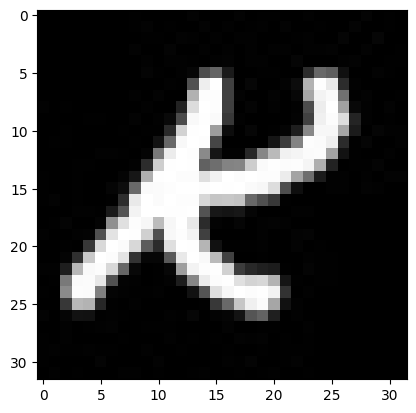

In [31]:
plt.imshow(x_test[0].reshape(32,32), cmap='gray')
print(ytest[0])

*Bu kod satırında, "x_test[0]" adresinde saklanan görüntünün resmini ekrana gösterdik ve görüntünün etiketini de yazdırmış olduk.*

*"plt.imshow()" fonksiyonu, bir görüntüyü ekrana göstermek için kullanılır. Bu fonksiyonun ilk argümanıyla gösterilecek görüntüyü numpy dizisi olarak verdik. "cmap='gray'" argümanı, görüntüyü siyah tonlarında gösterdik.*

*"x_test[0]" ifadesi, test veri kümesinin 0. indisteki görüntüyü gösteriyor. Bu görüntü, "x_test" değişkenine atamış olduğumuz numpy dizisinin bir öğesidir ve 32x32 boyutlarındadır. Ancak, "plt.imshow()" fonksiyonu sadece tek boyutlu dizileri kabul ediyor. Bu nedenle, "x_test[0]" dizisi "reshape()" fonksiyonu ile 32x32 boyutlarına tekrar düzenleyip ve "plt.imshow()" fonksiyonuna argüman olarak verdik.*

*"print(ytest[0])" kod satırında ise, "ytest" değişkeninin 0. indisteki etiketini yazdırdık. Bu etiket, "ytest" değişkenine atamış olduğumuz numpy dizisinin bir öğesidir ve gösterilen görüntünün hangi sınıfa ait olduğunu belirtiyor.*

## Test  Modeli 

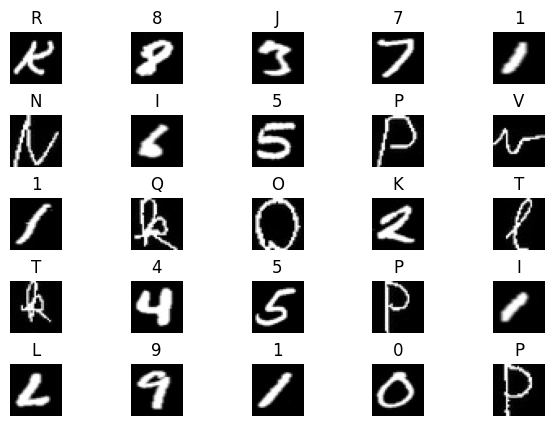

In [32]:
decode = {'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'A':'A','B':'B','C':'C','D':'D','E':'E', 
        'F':'F','G':'G','H':'H','I':'I','J':'J','K':'K','L':'L','M':'M', 'N':'N','O':'O','P':'P','Q':'Q','R':'R',
        'S':'S','T':'T','U':'U','V':'V','W':'W','Y':'Y','Z':'Z'}
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i].reshape(32,32),cmap='gray')
    title = str(decode[str(ts_pred[i])])
    plt.title(title)
    plt.subplots_adjust(left=0.1,
                       bottom=0.1,
                       right=1,
                       top=0.9,
                       wspace=0.3,
                       hspace=0.6)
   # plt.title(decode[ts_pred[i]])
    plt.axis('off')

*Bu kod satırlarında, test datasetinden 25 adet görüntünün resmini ekrana gösterdik ve görüntülerin tahmin edilen sınıflarını  her bir görüntünün üstüne yazdırdık.*

*Öncelikle, "decode" adında bir sözlük oluşturduk. Bu sözlükte, her bir sınıf için bir anahtar ve değer oluşturduk. Anahtar, sınıfı temsil eden bir harf ve sayıdır, değer ise bu harfin karşılığı olan sayıdır veya harfttir. Bu sözlüğü, daha sonra ekrana yazdıracağımız sınıf etiketlerini harf veya sayılara çevirmek için kullanacağız.*

*Daha sonra, "for" döngüsü kullanarak 25 adet görüntü için bir ekran parçası oluşturduk. "plt.subplot()" fonksiyonu, birden fazla görüntüyü aynı ekranda göstermek için kullanılır. Bu fonksiyonun ilk argümanı, kaç satır kaç sütundan oluşan bir düzen oluşturulacağını belirtiyor. İkinci argüman ise, oluşturulan düzenin hangi sıradaki ekran parçasına veri gösterileceğini belirtiyor. Bu örnekte, 5 satır ve 5 sütunluk bir düzen oluşturduk ve döngüde kaçıncı görüntünün ekrana gösterileceğini belirttik.*

*"plt.imshow()" fonksiyonu ile, görüntüyü ekranda gösterdik. Bu fonksiyonun ilk argümanı olarak, düzenlenmiş "x_test[i]" görüntüsünü verdik. "cmap='gray'" argümanı ile de, görüntüyü gri-siyah tonları olarak gösterdik.*

*Daha sonra, görüntünün öngörülen sınıfını harf karşılığı olarak "title" değişkenine atadık. Bu değişken, "decode" sözlüğü kullanılarak karakterler karşılığı olan karakterlere çevrilir. Son olarak, "plt.title()" fonksiyonu ile ekrana yazdırdık.*

In [33]:
np.where(ts_pred!=ytest)
d = pd.DataFrame({'Gercek':ytest, 'Tahmin':ts_pred})
d[d['Gercek']!=d['Tahmin']]

,Gercek,Tahmin
0,K,R
2,3,J
6,6,I
11,K,Q
13,2,K
...,...,...
6277,5,F
6280,L,M
6281,Y,3
6286,Z,G


*Bu kod bloğu ile tahmin edilen sınıfların gerçek sınıflarla karşılaştırılmasını yaptık. Öncelikle, gerçek sınıflar ve tahmin edilen sınıfların bir NumPy dizisi olarak saklandığı ytest ve ts_pred değişkenlerinden oluşan bir NumPy dizisi oluşturduk. Bu dizideki değerlerin eşleşip eşleşmediğini, "ts_pred!=ytest" ifadesiyle kontrol ettik. Eşleşmeyen değerlerin indekslerini, "np.where()" fonksiyonuyla bulduk. Daha sonra, bu indeksleri kullanarak gerçek ve tahmin edilen sınıfların bir Pandas veri çerçevesini oluşturduk ve veri çerçevesinde eşleşmeyen değerleri seçilerek gösterdik. Bu kod bloğunu, tahmin edilen sınıfların gerçek sınıflarla ne kadar benzer olduğunu ölçmek için kullanıyoruz.*

## Gerçek Veriler Üzerinde Test Etme

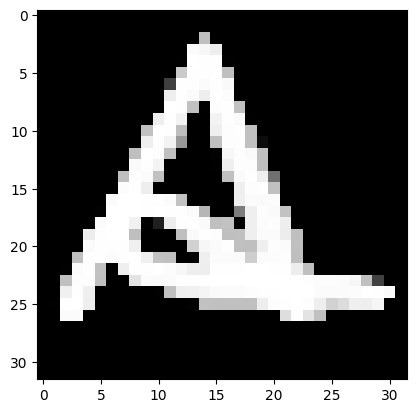

In [34]:
img = cv2.resize(cv2.imread('adeneme.jpg',0), (32,32))
plt.imshow(img,cmap='gray')

*Bu kod satırıyla, "cv2.resize()" fonksiyonu kullanılarak örneğin, yolunu verdiğimiz "adeneme.jpg" adlı bir görüntü dosyasını okudu ve önceden belirlemiş olduğumuz (32,32) boyutlarına yeniden ölçeklendirdik. Buradaki amacımız, kendi yazdığımız bir harfi doğru tahmin etmesini test etmekti. Daha sonra, bu yeniden ölçeklendirilmiş görüntüyü "plt.imshow()" fonksiyonu ile ekranda gösterdik. "cmap='gray'" argümanı ise önceden de değindiğimiz gibi görüntünün gri tonlamalı olarak gösterilmesini sağladı.*

In [35]:
img = pca.transform(img.reshape(1,-1)/255)

*Bu kod satırında, verilen görüntünün boyutlarını 32x32 piksel olarak değiştirdik ve numpy dizisi olarak okundu. Daha sonra, görüntüyü "img" değişkenine atadık.*

*Sonra, "pca" değişkenine atanan PCA nesnesinin "transform()" fonksiyonunu kullanarak, görüntünün özelliklerini önceden belirlediğimiz sayıda özellikle özetledik. Bu işlem sırasında, görüntünün orijinal boyutlarındaki özellikleri azalttık ve görüntünün özetlenmiş özelliklerini numpy dizisi olarak döndürdük. Bu özellikleri, daha önceden belirlediğimiz n_components değerine göre seçtik. Bu değer, PCA sırasında kullanılan özellik sayısını belirtiyor. "img" değişkeninin yeni özellikleri, "img" değişkenine atanmış oldu.*

In [36]:
decode[log.predict(img)[0]]

'A'

*"decode" değişkeninin, görüntülerin sınıfını temsil eden harflerin sayısal karşılıklarını tutan bir sözlük verisi olduğunu söylemiştik. "log.predict(img)[0]" kod satırı, "log" adlı Logistic Regression modelini kullanarak verilen görüntünün sınıfını tahmin ettik ve tahmin sonucunu bir dize olarak döndürmüş olduk. "decode" sözlüğünde bu dizeyle eşleşen sayısal karşılığı arandı ve eşleşen sayısal karşılık döndürüldü. Örneğin, eğer "log.predict(img)[0]" dizesi "A" olarak döndürürse, "decode" sözlüğünde "A" anahtarı ile eşleşen sayısal değer 10 olarak döndürülür. Son olarak, tahmin edilen harf çıktısı ekranda yazdırılır örneğin, biz "A" harfinin testini yaptık ve doğru tahminde bulunup 'A' çıktısını aldık.*